# SuperAI Season 4 - Level Individual Hackathon - Sleep Stages Classification

In [147]:
%pwd

'/kaggle/working'

## Data Exploration

### Sample

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [149]:
sample_train = pd.read_csv('/kaggle/input/io-t-sleep-stage-classification-version-2/train/train/train001.csv')

In [150]:
sample_train

,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,25.325870,-21.809247,-60.302750,4.940839,31.722653,0.064595,72.015570,1.050338,W
1,20.021505,-19.437787,-60.565345,7.408788,31.722647,0.064523,72.015802,1.050338,W
2,16.314478,-21.624667,-61.142561,4.105717,31.722735,0.064659,72.017417,1.050338,W
3,9.324392,-21.761314,-61.985822,3.972967,31.722564,0.064440,72.013801,1.050338,W
4,-1.014338,-19.055301,-59.934137,9.097628,31.722790,0.065397,72.018920,1.050338,W
...,...,...,...,...,...,...,...,...,...
356635,59.628219,-32.636398,-23.730186,49.433474,34.965154,0.140579,77.236003,1.034892,W
356636,163.656085,-32.615814,-23.717156,49.391365,34.965010,0.140539,77.235527,1.034892,W
356637,203.457671,-32.621808,-23.733782,49.468040,34.965266,0.140530,77.235586,1.034892,W
356638,182.633893,-32.628004,-23.718944,49.363862,34.964999,0.140567,77.235842,1.034892,W


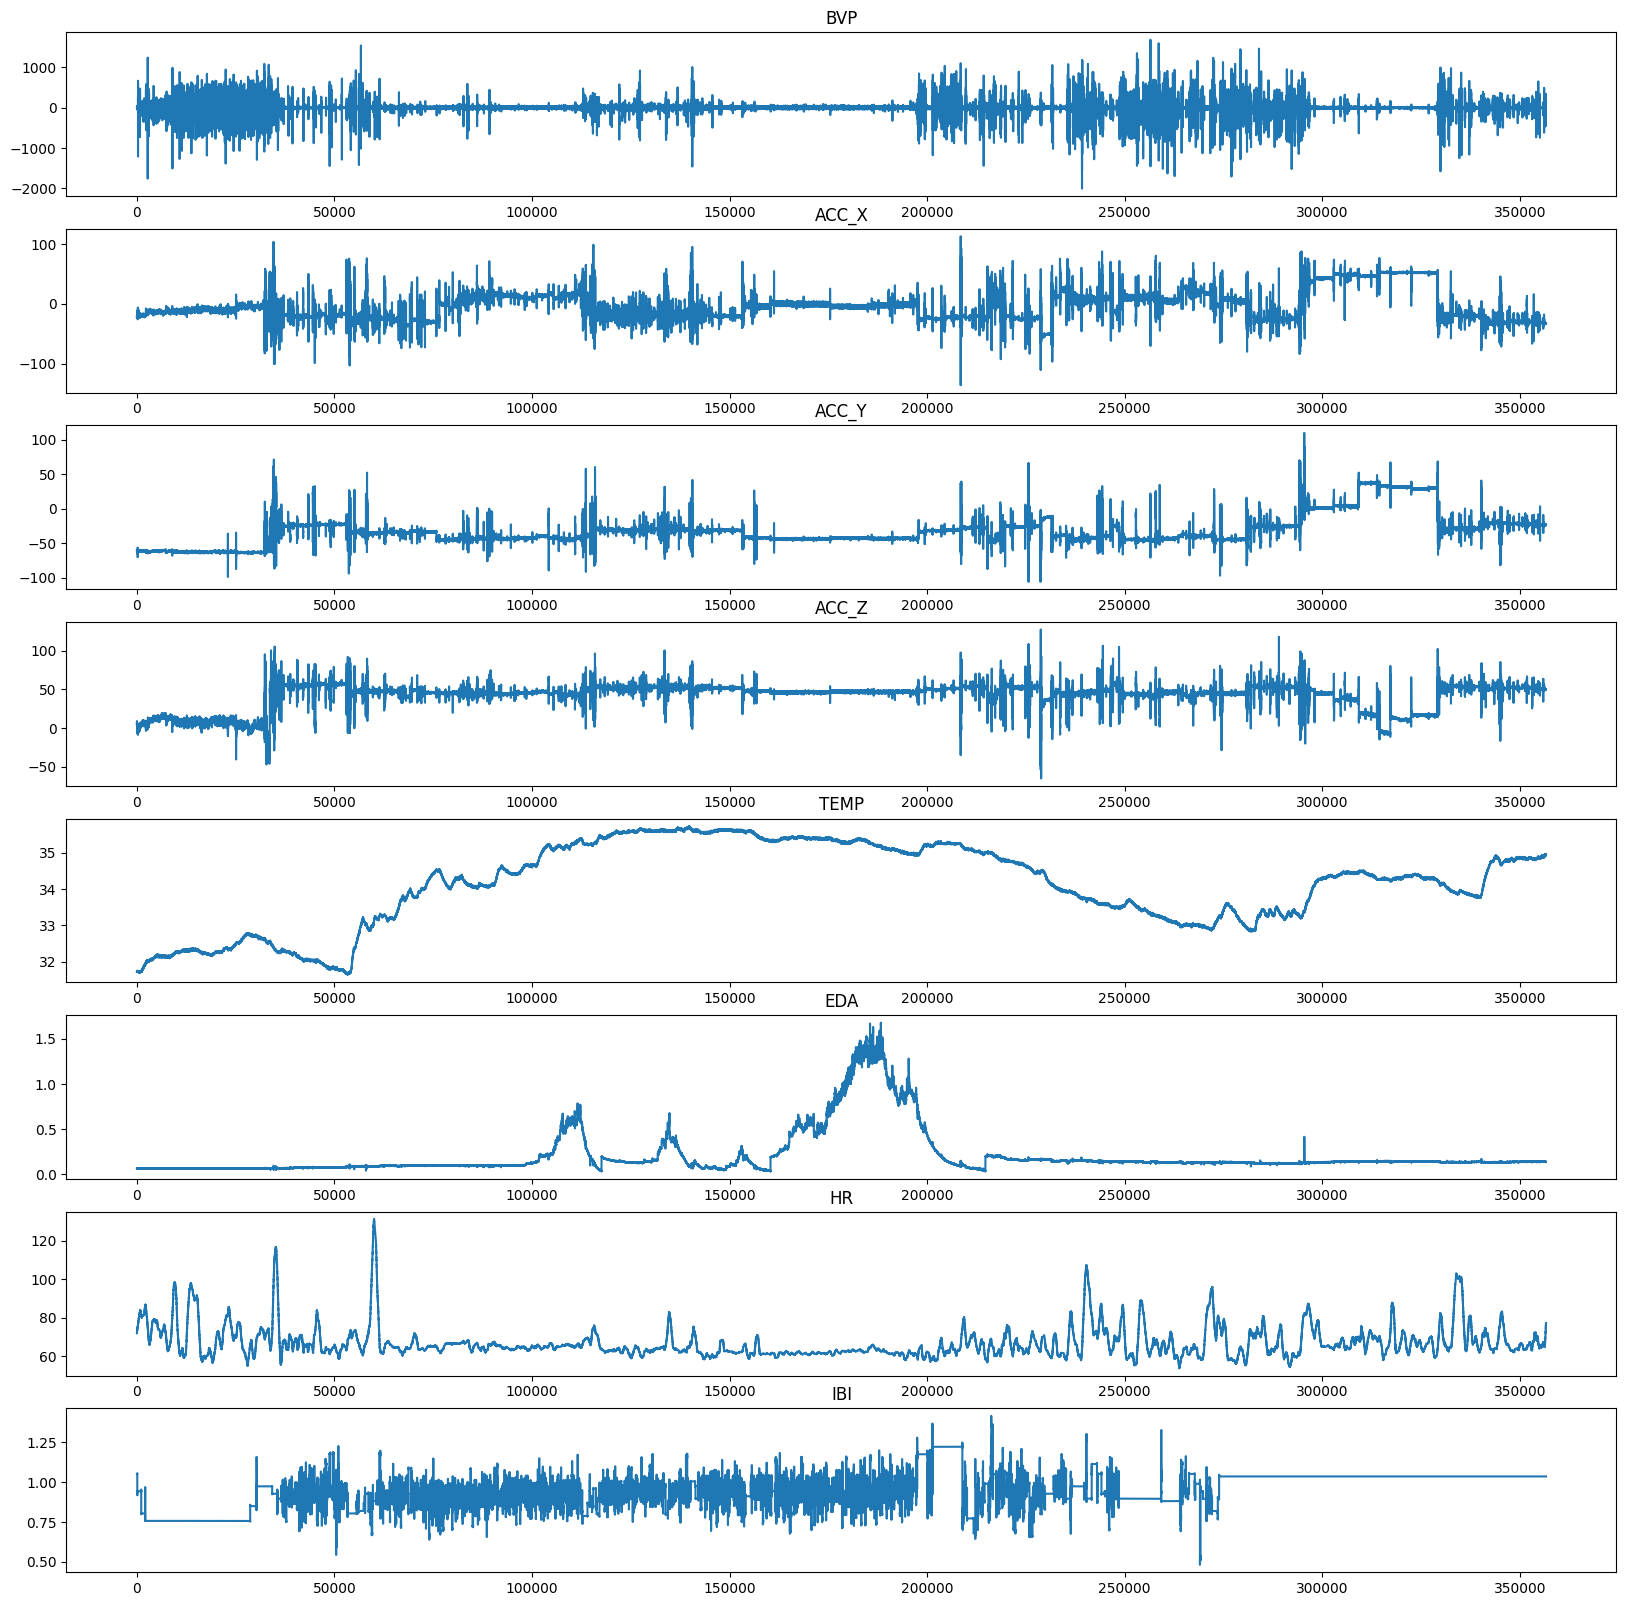

In [5]:
fig , axes = plt.subplots(8 , 1 , figsize = (20 , 20))

for idx , col in enumerate (sample_train.drop(columns = ['Sleep_Stage']).columns) :
    
    axes[idx].plot(sample_train[col])
    axes[idx].set_title(col)

plt.show()

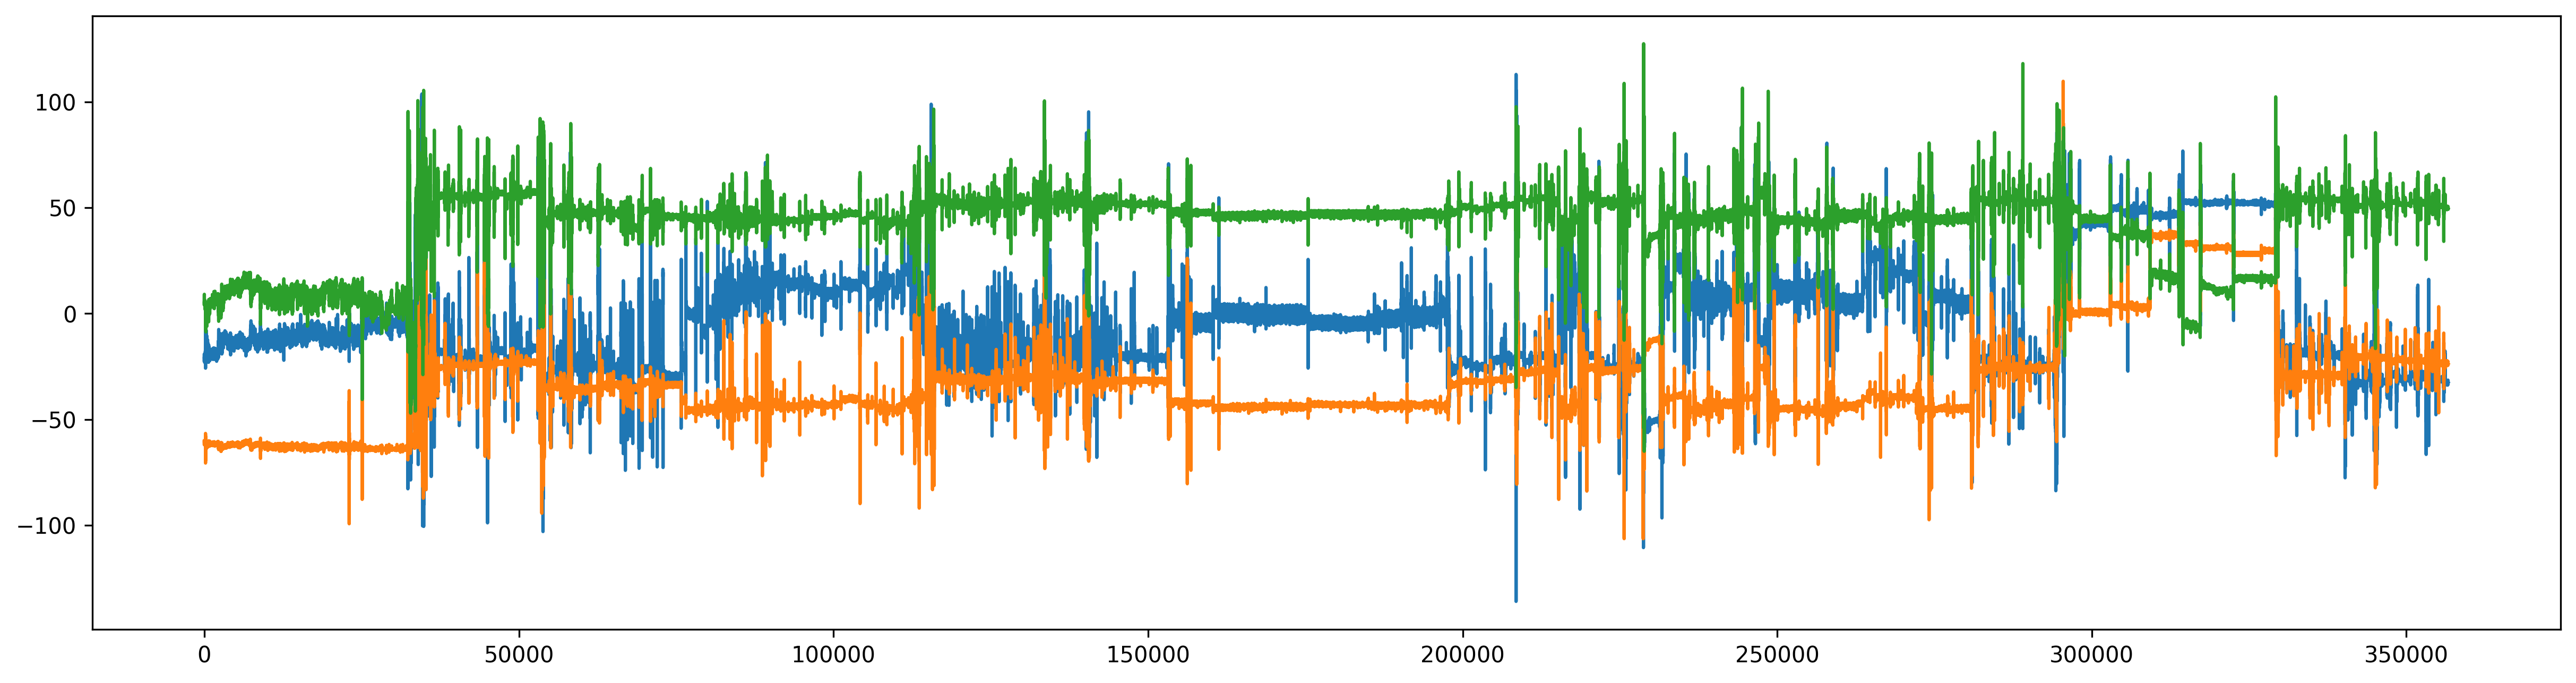

In [6]:
figure(figsize=(20 , 5), dpi=300)

for idx , col in enumerate (sample_train.columns[1 : 4]) :
    
    plt.plot(sample_train[col])

plt.show()

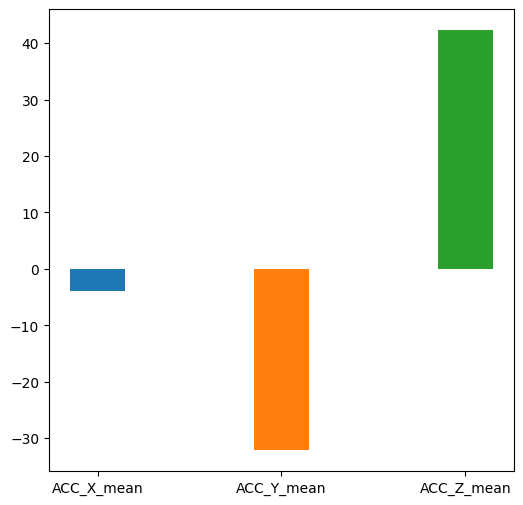

In [7]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns[1 : 4]):
    
    plt.bar(f'{col}_mean' , sample_train[col].mean() ,  width=0.3)
    
plt.show()

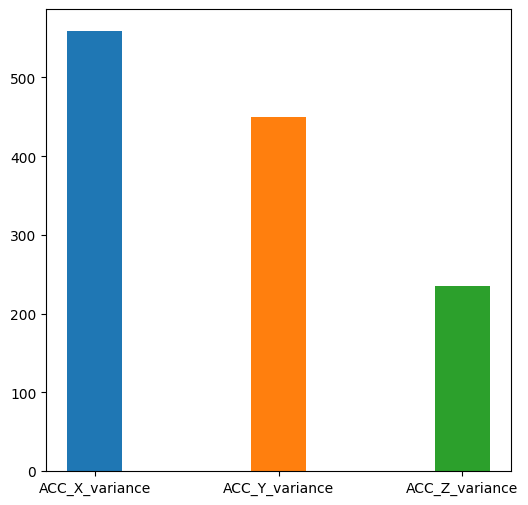

In [8]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns[1 : 4]):
    
    plt.bar(f'{col}_variance' , sample_train[col].var() ,  width=0.3)
    
plt.show()

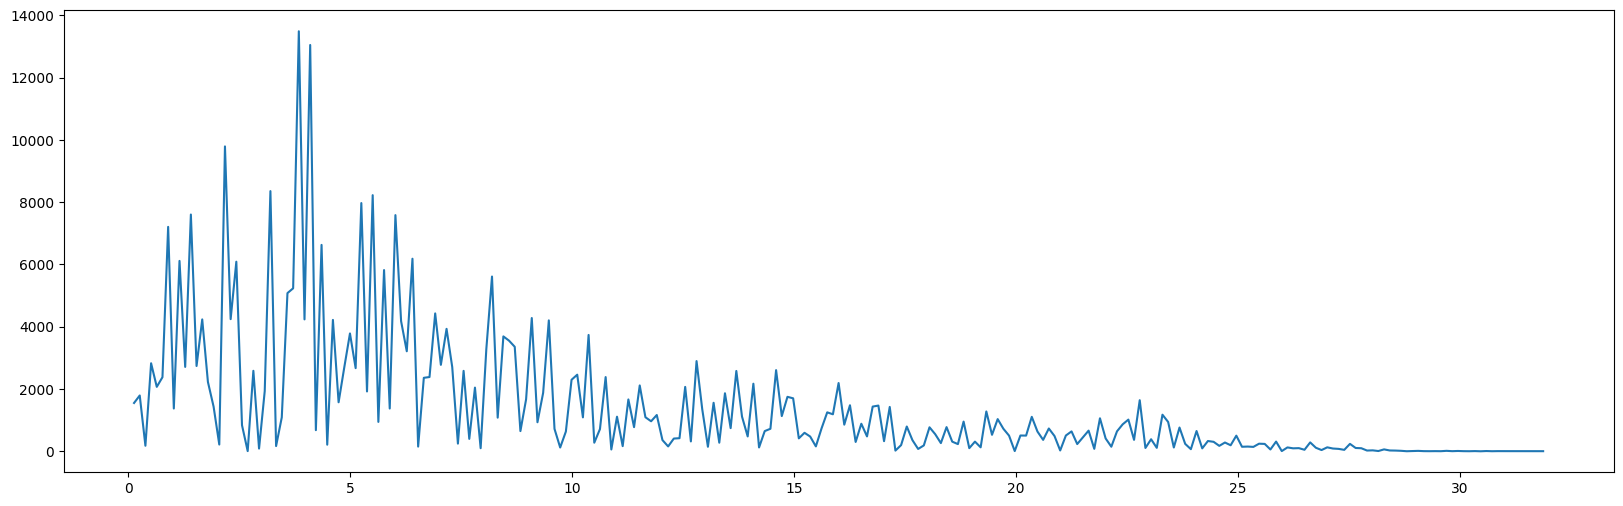

In [151]:
figure(figsize=(20 , 6), dpi=100)

start = 1
divide = 2

for idx , col in enumerate (sample_train.columns[ : 1]) :
    
    mag = np.fft.fft(sample_train[col][ : 500])
    freq = np.fft.fftfreq(len(sample_train[col][ : 500])) * 64
    
    plt.plot(freq[start : len(freq) // divide] , np.abs(mag.real[start : len(freq) // divide]))

plt.show()

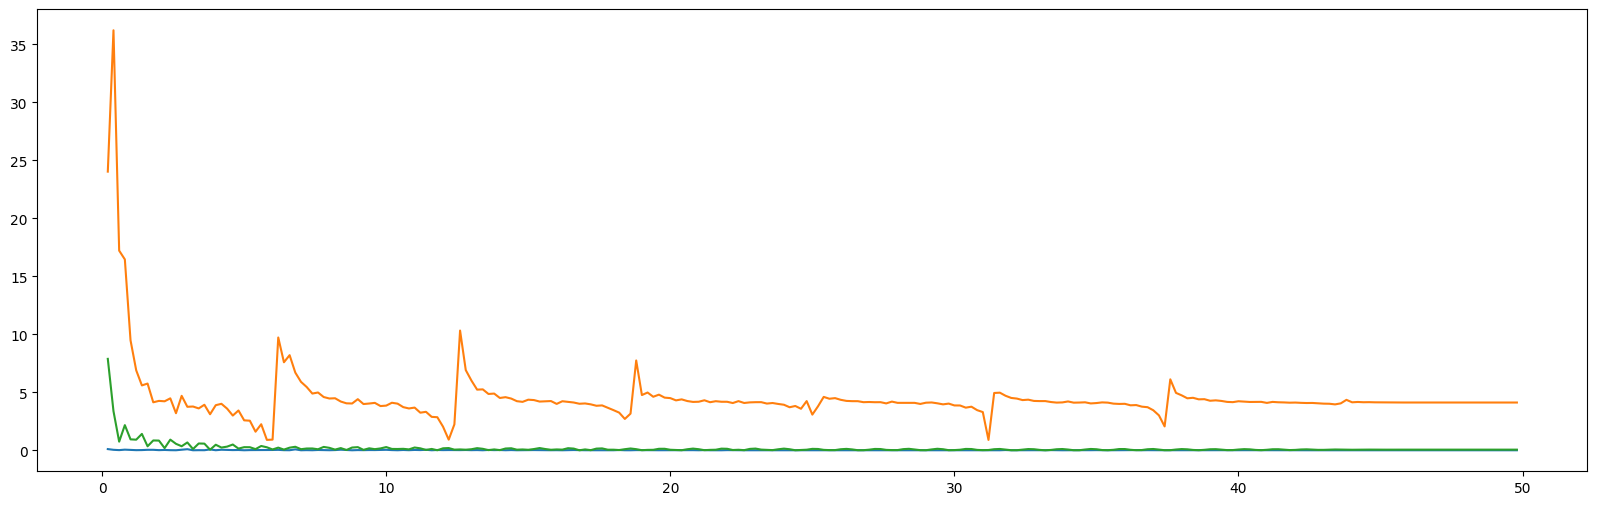

In [152]:
figure(figsize=(20 , 6), dpi=100)

start = 1
divide = 2

for idx , col in enumerate (sample_train.columns[5 : 8]) :
    
    mag = np.fft.fft(sample_train[col][ : 500])
    freq = np.fft.fftfreq(len(sample_train[col][ : 500])) * 100
    
    plt.plot(freq[start : len(freq) // divide] , np.abs(mag.real[start : len(freq) // divide]))

plt.show()

In [153]:
sample_train.shape

(356640, 9)

### Cutting 30 Seconds (1920 Rows)

In [11]:
import glob
from tqdm.notebook import tqdm

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Cutting 30 Seconds = (16 * 30) * 30 - (7,680 Rows)

In [13]:
import os
import pandas as pd
import glob
from tqdm import tqdm

idx = 0
output_dir = '/kaggle/working/ss5ai/train'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

for file_path in tqdm(sorted(glob.glob('/kaggle/input/io-t-sleep-stage-classification-version-2/train/train/*'))):
    
    df = pd.read_csv(file_path)
    
    for i in range(0, len(df), 7680): 
        
        label = df.iloc[i]['Sleep_Stage']
        label_dir = os.path.join(output_dir, str(label))  # Create path for label folder
        
        # Ensure the label-specific folder exists
        os.makedirs(label_dir, exist_ok=True)

        cropped_df = df.iloc[i : i + 7680]
        cropped_df.to_csv(os.path.join(label_dir, f'{idx}.csv'), index=False)
        
        idx += 1

100%|██████████| 83/83 [06:56<00:00,  5.02s/it]


### All Classes

In [14]:
import glob
import os
from matplotlib.pyplot import figure

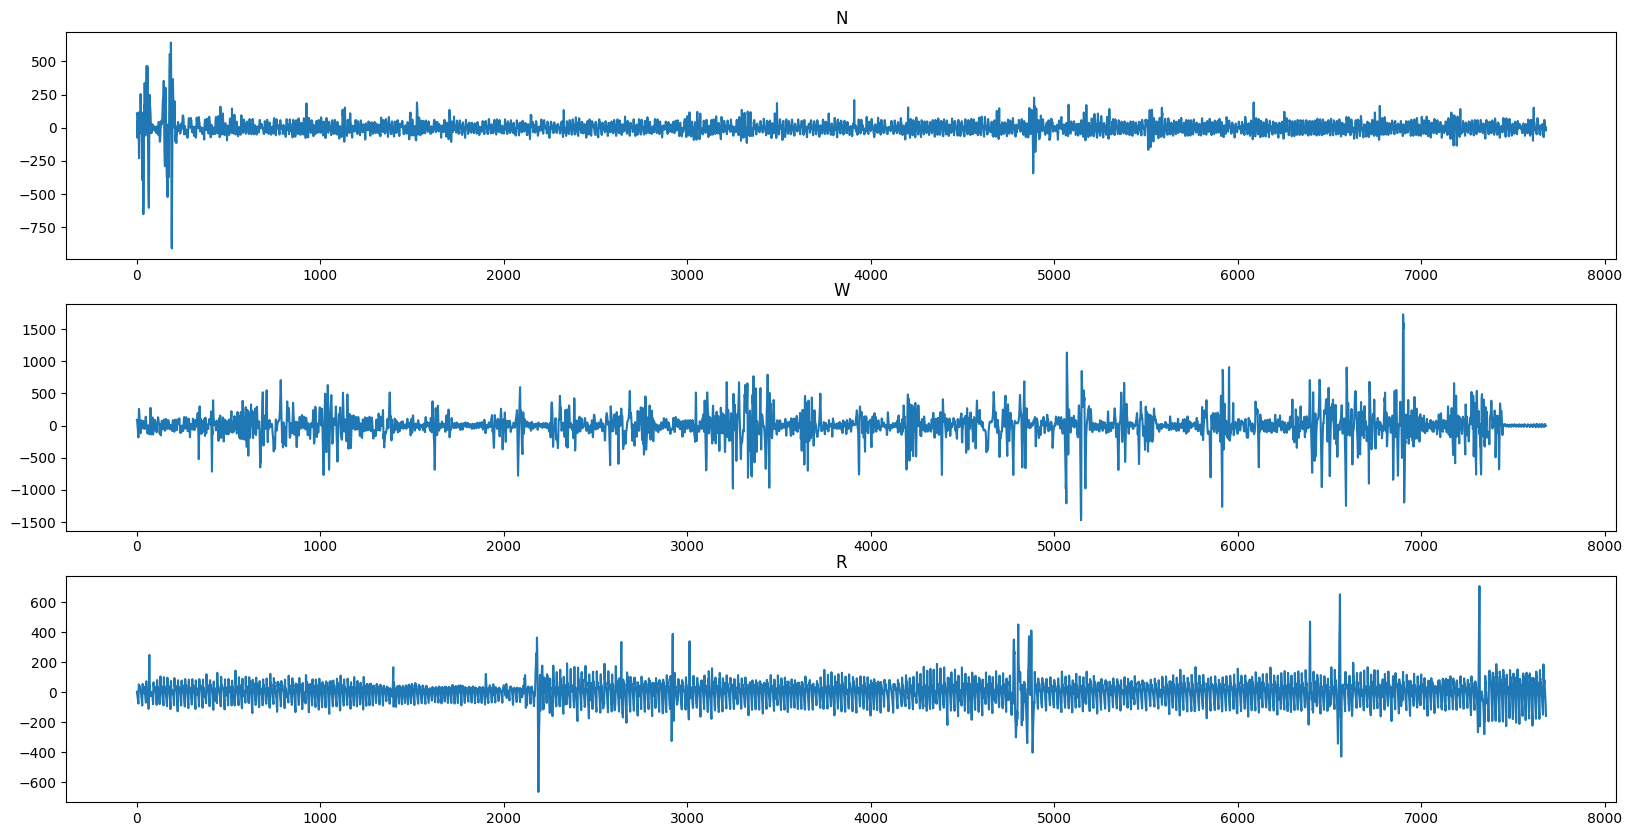

In [15]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('/kaggle/working/ss5ai/train')) :
    
    file = glob.glob(f'/kaggle/working/ss5ai/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns[0 : 1] :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

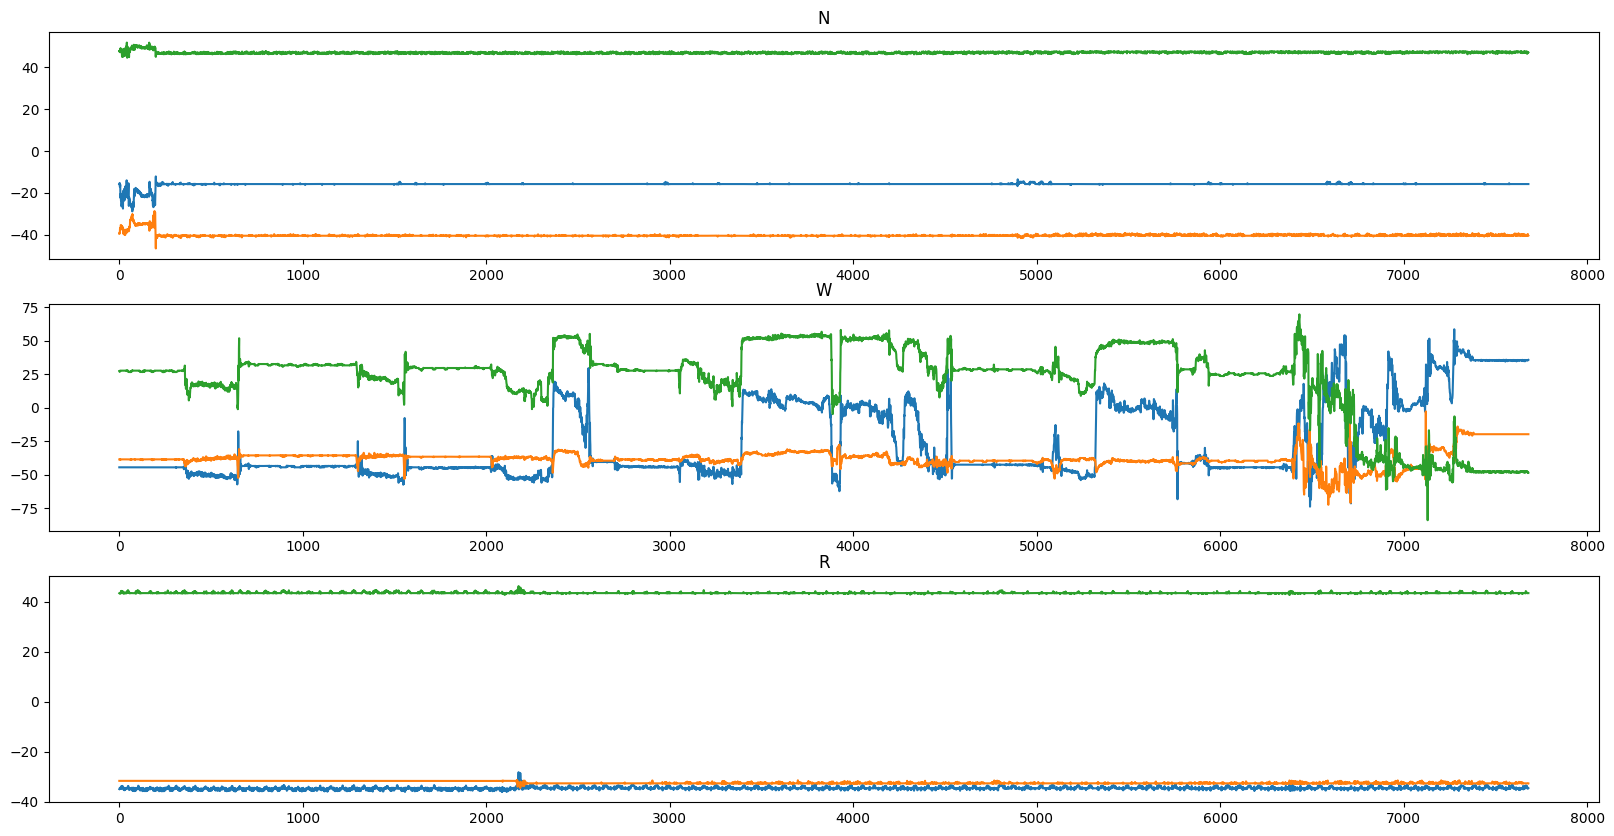

In [16]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('/kaggle/working/ss5ai/train')) :
    
    file = glob.glob(f'/kaggle/working/ss5ai/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns[1 : 4] :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

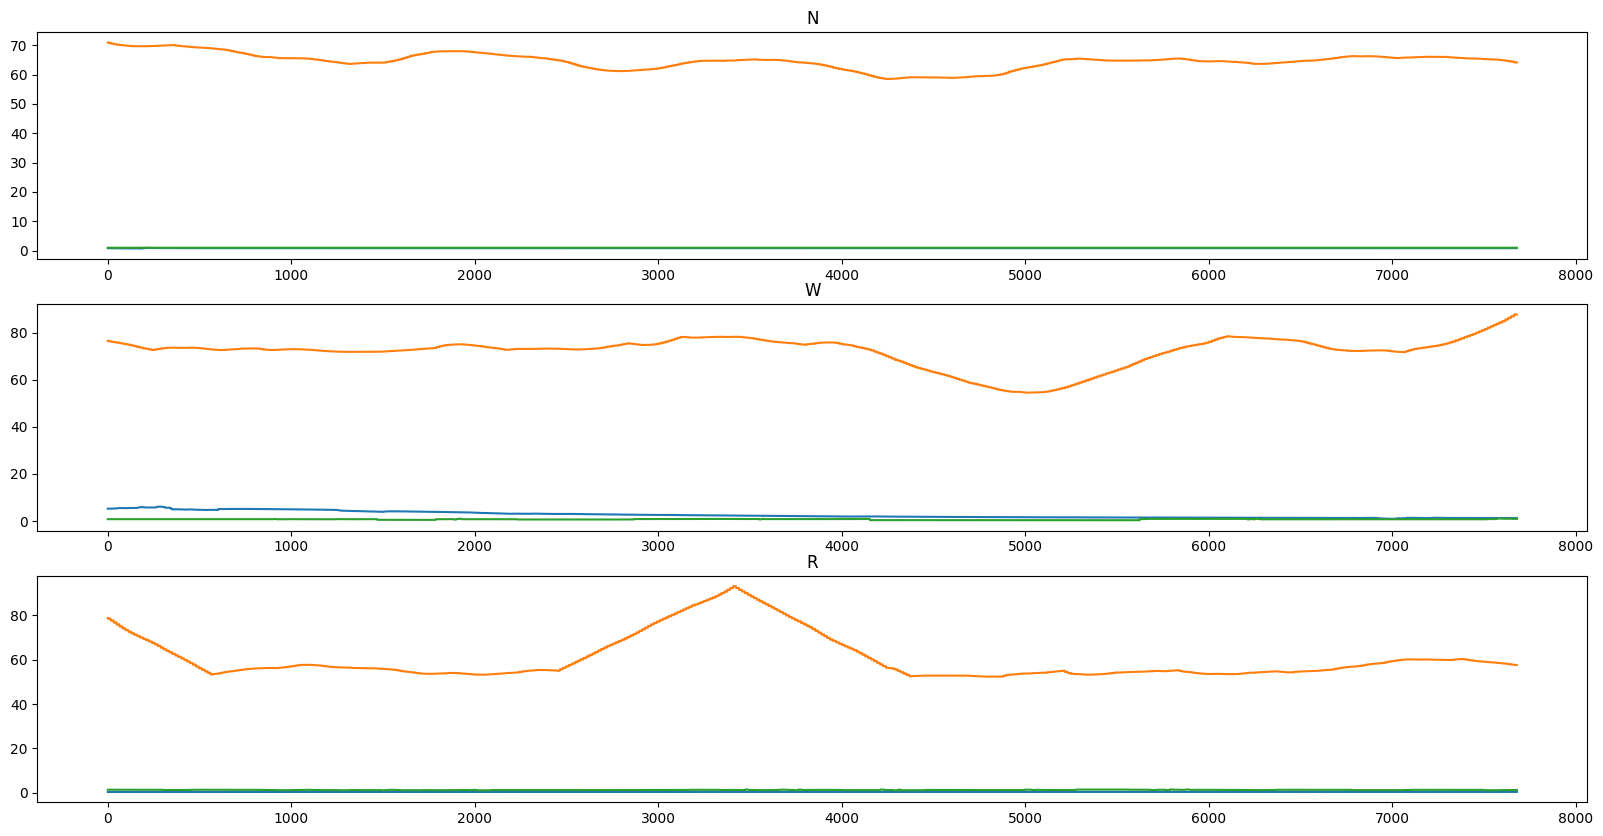

In [17]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('/kaggle/working/ss5ai/train')) :
    
    file = glob.glob(f'/kaggle/working/ss5ai/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns[5 : 8] :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

### Features Engineering

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def raw_to_features(df , index) :
    
    freq = np.fft.fftfreq(7680) * 64

    start = 5
    divide = 2
    
    features = dict([])
    
    for idx , col in enumerate(df.columns) :
        
        features[f'{col}_mean'] = df[col].mean()
        features[f'{col}_std']  = df[col].std()
        features[f'{col}_var']  = df[col].var()
        
        features[f'{col}_fourier_mean'] = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).mean()
        features[f'{col}_fourier_std']  = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).std()
        features[f'{col}_fourier_var']  = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).var()
    
    result_df = pd.DataFrame(features, index = [index])
    
    return result_df

In [23]:
sample_N_df = pd.read_csv('/kaggle/working/ss5ai/train/N/1032.csv')

In [24]:
sample_N_df

,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,-7.634097,-27.628885,30.624804,49.457349,27.361009,0.452142,55.643854,1.142964,N
1,-10.532027,-27.713449,30.653527,49.404690,27.351396,0.452150,55.658281,1.143062,N
2,-8.713966,-27.662117,30.647926,49.441179,27.354058,0.452143,55.654552,1.142981,N
3,-7.427982,-27.670575,30.638338,49.424634,27.352816,0.452193,55.655885,1.143030,N
4,-10.321117,-27.718081,30.658172,49.421246,27.353313,0.451404,55.655849,1.143016,N
...,...,...,...,...,...,...,...,...,...
7675,21.073215,-15.803944,-3.887914,61.311772,27.254104,0.463774,52.266337,1.112126,N
7676,18.086689,-15.840016,-2.922117,61.705284,27.254709,0.461985,52.262674,1.112118,N
7677,10.746980,-15.783355,-3.500740,61.414079,27.254433,0.460732,52.265952,1.112126,N
7678,2.071017,-15.856879,-3.774670,61.209704,27.254115,0.461216,52.264738,1.112121,N


In [154]:
sample_features_df = raw_to_features(sample_N_df.drop(columns = ['Sleep_Stage']) , 0)
sample_features_df['labels'] = sample_N_df['Sleep_Stage']
sample_features_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var,labels
0,0.001088,41.706781,1739.455573,2320.895979,2826.32847,7.988133e+06,-23.417632,6.591606,43.449272,184.376936,...,10.568099,95.232551,9069.238751,1.133424,0.110425,0.012194,2.541228,8.060678,64.974526,N


In [79]:
lst = []

for file_path in tqdm(sorted(glob.glob('/kaggle/working/ss5ai/train/*/*'))) : 
    
    df = pd.read_csv(file_path)
    features_df = raw_to_features(df.drop(columns = ['Sleep_Stage']) , 0)
    features_df['labels'] = df['Sleep_Stage']
    
    lst.append(features_df)

train_df = pd.concat(lst)
train_df.index = pd.Series(np.arange(len(train_df)))
train_df.index.name = 'id'

100%|██████████| 4191/4191 [01:33<00:00, 44.83it/s]


In [155]:
train_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var,labels
0,0.005580,30.747445,945.405393,1596.092397,2172.951794,4.721719e+06,0.622988,7.557687,57.118637,204.510474,...,5.737680,46.271298,2141.033040,0.890237,5.300950e-02,2.810007e-03,1.744093e+00,4.246686e+00,1.803434e+01,0
1,0.003960,49.406654,2441.017453,2503.910744,3535.454950,1.249944e+07,5.829833,4.481166,20.080848,185.938026,...,7.631565,111.428482,12416.306502,1.127568,5.219030e-14,2.723828e-27,2.728262e-15,7.095823e-14,5.035071e-27,0
2,-0.003841,45.057569,2030.184499,2168.046600,3302.981303,1.090969e+07,7.597025,0.395672,0.156556,23.653014,...,102.232536,417.671628,174449.588570,0.931780,1.586718e-01,2.517675e-02,8.914125e-01,3.912376e+00,1.530669e+01,0
3,-0.009474,32.276677,1041.783902,1565.336275,2357.966371,5.560005e+06,7.791566,0.256432,0.065757,16.389135,...,90.672619,364.468884,132837.567616,0.742002,1.836669e-01,3.373353e-02,1.736962e+00,6.548660e+00,4.288495e+01,0
4,-0.011609,47.974174,2301.521417,1641.945505,3873.038957,1.500043e+07,-24.776397,1.291480,1.667920,53.523476,...,4.025660,47.095291,2217.966387,0.638616,3.265445e-02,1.066313e-03,8.916936e-01,2.603524e+00,6.778335e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,-0.005770,47.468750,2253.282268,2423.571507,3384.052693,1.145181e+07,25.035515,32.943382,1085.266395,453.036041,...,8.553108,38.724918,1499.619294,0.624803,3.166767e-02,1.002841e-03,8.417914e-01,2.303466e+00,5.305954e+00,2
4187,0.039451,51.942396,2698.012531,2596.040525,3742.395689,1.400553e+07,5.588347,0.485828,0.236029,23.874572,...,113.840132,450.587652,203029.231833,0.824765,1.830068e-01,3.349147e-02,2.009131e+00,1.043305e+01,1.088484e+02,2
4188,-0.030867,132.280688,17498.180508,7289.504633,9022.567773,8.140673e+07,-37.514689,24.500617,600.280225,892.713452,...,26.267597,233.436669,54492.678322,1.037787,5.864549e-02,3.439293e-03,8.584491e-01,2.514773e+00,6.324084e+00,2
4189,0.003744,115.621250,13368.273364,5955.327337,8205.051906,6.732288e+07,-9.655413,20.037013,401.481900,395.371201,...,21.717570,206.731894,42738.076017,1.128704,6.478800e-02,4.197485e-03,1.469567e+00,3.727848e+00,1.389685e+01,2


In [177]:
lst = []

for file_path in tqdm(sorted(glob.glob('/kaggle/input/io-t-sleep-stage-classification-version-2/test_segment/test_segment/*/*'))) : 
    
    df = pd.read_csv(file_path)
    features_df = raw_to_features(df , 0)
    
    lst.append(features_df)

test_df = pd.concat(lst)

100%|██████████| 7010/7010 [00:51<00:00, 135.23it/s]


In [178]:
index = [ file_path.split('/')[-1].split('.')[0] for file_path in sorted(glob.glob('/kaggle/input/io-t-sleep-stage-classification-version-2/test_segment/test_segment/*/*'))]
test_df.index = pd.Series(index)
test_df.index.name = 'id'
test_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_var,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var
id,,,,,,,,,,,,,,,,,,,,,
test001_00000,0.139589,30.618859,937.514518,374.309373,556.646758,3.098556e+05,-34.361038,0.751604,0.564908,8.141269,...,0.962080,3.573384,5.019626,25.196641,1.225885,6.164782e-02,3.800454e-03,3.954484e-01,6.915560e-01,4.782497e-01
test001_00001,-0.399159,78.622404,6181.482451,1158.898476,1295.756586,1.678985e+06,-28.504890,15.974008,255.168940,146.166381,...,0.672355,5.110679,7.877607,62.056693,1.287238,5.460252e-02,2.981435e-03,2.524775e-01,4.330212e-01,1.875074e-01
test001_00002,0.350513,131.449024,17278.845908,1687.595874,2357.397200,5.557322e+06,-12.404753,4.402234,19.379666,30.377910,...,9.899271,15.531578,21.931470,480.989390,1.297476,8.251211e-15,6.808248e-29,5.813414e-16,1.878461e-15,3.528614e-30
test001_00003,-1.553985,143.262170,20524.049313,1761.901246,2625.166889,6.891501e+06,-7.981104,1.752206,3.070225,14.116674,...,0.789212,2.547562,3.989485,15.915987,1.297476,8.251211e-15,6.808248e-29,5.813414e-16,1.878461e-15,3.528614e-30
test001_00004,1.325987,171.408210,29380.774321,2113.413391,3131.939100,9.809043e+06,-7.692169,3.382348,11.440281,27.199089,...,3.715934,8.769985,12.251993,150.111342,1.297476,8.251211e-15,6.808248e-29,5.813414e-16,1.878461e-15,3.528614e-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test010_00696,0.086407,23.506460,552.553655,155.538001,495.855211,2.458724e+05,-30.613223,0.108216,0.011711,1.887026,...,0.265847,2.430201,3.427163,11.745448,1.178047,1.486258e-02,2.208963e-04,1.128631e-01,2.088909e-01,4.363542e-02
test010_00697,0.021243,45.221024,2044.941038,515.293179,857.199198,7.347905e+05,-30.549123,0.397222,0.157785,4.704522,...,0.086700,0.868387,1.197813,1.434756,1.168834,2.153063e-02,4.635680e-04,1.353683e-01,2.804406e-01,7.864691e-02
test010_00698,0.116106,25.544957,652.544837,278.672825,491.351690,2.414265e+05,-29.708049,0.203977,0.041606,2.189240,...,0.213867,1.882991,2.588174,6.698645,1.162346,2.212813e-02,4.896540e-04,1.321108e-01,2.411708e-01,5.816334e-02


In [179]:
import os

# Define the output directory
dataframe_output_dir = "/kaggle/working/ss5ai/dataframe"

# Create the directory if it doesn't exist
os.makedirs(dataframe_output_dir, exist_ok=True)

# Save the DataFrames
train_df.to_csv(f"{dataframe_output_dir}/train_df.csv", index=False)
test_df.to_csv(f"{dataframe_output_dir}/test_df.csv", index=False)

In [156]:
train_df = pd.read_csv("/kaggle/working/ss5ai/dataframe/train_df.csv")

In [157]:
train_df.head()

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var,labels
0,0.005580,30.747445,945.405393,1596.092397,2172.951794,4.721719e+06,0.622988,7.557687,57.118637,204.510474,...,5.737680,46.271298,2141.033040,0.890237,5.300950e-02,2.810007e-03,1.744093e+00,4.246686e+00,1.803434e+01,N
1,0.003960,49.406654,2441.017453,2503.910744,3535.454950,1.249944e+07,5.829833,4.481166,20.080848,185.938026,...,7.631565,111.428482,12416.306502,1.127568,5.219030e-14,2.723828e-27,2.728262e-15,7.095823e-14,5.035071e-27,N
2,-0.003841,45.057569,2030.184499,2168.046600,3302.981303,1.090969e+07,7.597025,0.395672,0.156556,23.653014,...,102.232536,417.671628,174449.588570,0.931780,1.586718e-01,2.517675e-02,8.914125e-01,3.912376e+00,1.530669e+01,N
3,-0.009474,32.276677,1041.783902,1565.336275,2357.966371,5.560005e+06,7.791566,0.256432,0.065757,16.389135,...,90.672619,364.468884,132837.567616,0.742002,1.836669e-01,3.373353e-02,1.736962e+00,6.548660e+00,4.288495e+01,N
4,-0.011609,47.974174,2301.521417,1641.945505,3873.038957,1.500043e+07,-24.776397,1.291480,1.667920,53.523476,...,4.025660,47.095291,2217.966387,0.638616,3.265445e-02,1.066313e-03,8.916936e-01,2.603524e+00,6.778335e+00,N


In [158]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming train_df is your DataFrame and 'labels' is your target column

# Separate features and labels
features = train_df.drop('labels', axis=1)  # Drop the 'labels' column
labels = train_df['labels']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Combine scaled features with the original labels
train_df_scaled = pd.concat([scaled_df, labels], axis=1)

# Display the first few rows of the scaled DataFrame
print(train_df_scaled.head())

   BVP_mean   BVP_std   BVP_var  BVP_fourier_mean  BVP_fourier_std  \
0  0.107697 -0.619602 -0.531177         -0.399523        -0.671488   
1  0.074443 -0.185435 -0.341738          0.037529        -0.247193   
2 -0.085733 -0.286631 -0.393776         -0.124166        -0.319587   
3 -0.201405 -0.584020 -0.518969         -0.414330        -0.613873   
4 -0.245246 -0.218766 -0.359407         -0.377448        -0.142066   

   BVP_fourier_var  ACC_X_mean  ACC_X_std  ACC_X_var  ACC_X_fourier_mean  ...  \
0        -0.531763    0.348481   0.091867  -0.243337            0.460018  ...   
1        -0.361789    0.509293  -0.226503  -0.354949            0.349184  ...   
2        -0.396531    0.563872  -0.649285  -0.414990           -0.619278  ...   
3        -0.513443    0.569880  -0.663694  -0.415263           -0.662626  ...   
4        -0.307132   -0.435970  -0.556583  -0.410435           -0.441021  ...   

   HR_fourier_mean  HR_fourier_std  HR_fourier_var  IBI_mean   IBI_std  \
0        -0.417899

In [159]:
train_df_scaled

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var,labels
0,0.107697,-0.619602,-0.531177,-0.399523,-0.671488,-0.531763,0.348481,0.091867,-0.243337,0.460018,...,-0.417899,-0.460884,-0.308799,-0.217473,-0.253252,-0.337351,0.313064,-0.028747,-0.252975,N
1,0.074443,-0.185435,-0.341738,0.037529,-0.247193,-0.361789,0.509293,-0.226503,-0.354949,0.349184,...,-0.312992,0.263484,-0.076281,0.972372,-1.193746,-0.531052,-1.558069,-1.352556,-0.664633,N
2,-0.085733,-0.286631,-0.393776,-0.124166,-0.319587,-0.396531,0.563872,-0.649285,-0.414990,-0.619278,...,4.927190,3.668067,3.590355,-0.009198,1.621406,1.204445,-0.601726,-0.132961,-0.315237,N
3,-0.201405,-0.584020,-0.518969,-0.414330,-0.613873,-0.513443,0.569880,-0.663694,-0.415263,-0.662626,...,4.286858,3.076599,2.648721,-0.960638,2.064868,1.794286,0.305413,0.688842,0.314274,N
4,-0.245246,-0.218766,-0.359407,-0.377448,-0.142066,-0.307132,-0.435970,-0.556583,-0.410435,-0.441021,...,-0.512732,-0.451724,-0.307058,-1.478958,-0.614391,-0.457549,-0.601425,-0.540966,-0.509908,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,-0.125355,-0.230527,-0.365517,-0.001149,-0.294341,-0.384683,1.102454,2.718871,2.854940,1.943134,...,-0.261946,-0.544779,-0.323313,-1.548205,-0.631899,-0.461924,-0.654962,-0.634502,-0.543517,W
4187,0.803211,-0.126432,-0.309187,0.081883,-0.182750,-0.328875,0.501835,-0.639955,-0.414750,-0.617956,...,5.570164,4.034003,4.237081,-0.545709,2.053156,1.777600,0.597407,1.899711,1.819980,W
4188,-0.640673,1.742901,1.565444,2.341461,1.461540,1.144108,-0.829388,1.845183,1.393456,4.566979,...,0.719304,1.619881,0.875861,0.522258,-0.153259,-0.293973,-0.637091,-0.568632,-0.520277,W
4189,0.070010,1.355265,1.042338,1.699147,1.206959,0.836320,0.031037,1.383273,0.794386,1.599010,...,0.467266,1.322997,0.609868,0.978068,-0.044278,-0.241709,0.018541,-0.190483,-0.347418,W


In [53]:
import pandas as pd

# Assuming your original DataFrame is named 'train_df'

selected_features = [
    'TEMP_mean',
    'EDA_mean',
    'IBI_mean',
    'EDA_fourier_mean',
    'HR_var',
    'HR_mean',
    'HR_std',
    'ACC_Y_mean',
    'IBI_fourier_mean',
    'ACC_Z_mean',
    'ACC_X_fourier_mean',
    'ACC_X_std',
    'HR_fourier_mean',
    'BVP_mean',
    'TEMP_std',
    'EDA_std',
    'ACC_X_mean',
    'ACC_Z_fourier_mean',
    'ACC_Y_fourier_mean',
    'TEMP_fourier_mean',
    'EDA_var',
    'HR_fourier_std',
    'labels'
]

# Filter the train_df to include only the selected features
train_df = train_df[selected_features]

# Display the first few rows of the filtered DataFrame
print(train_df.head())

   TEMP_mean  EDA_mean  IBI_mean  EDA_fourier_mean      HR_var    HR_mean  \
0  34.208136  0.098542  0.890237          0.068238    2.058137  66.279476   
1  34.107057  4.628488  1.127568          0.858012    8.510877  55.696195   
2  33.976607  4.408471  0.931780          0.389411  371.886959  67.921695   
3  33.613439  4.417683  0.742002          0.399275  413.615408  73.523784   
4  32.637216  0.259744  0.638616          0.112320    1.117131  91.663117   

      HR_std  ACC_Y_mean  IBI_fourier_mean  ACC_Z_mean  ...  BVP_mean  \
0   1.434621  -44.292077      1.744093e+00   45.547779  ...  0.005580   
1   2.917341  -36.332037      2.728262e-15   50.612162  ...  0.003960   
2  19.284371  -34.350017      8.914125e-01   52.367377  ... -0.003841   
3  20.337537  -34.457520      1.736962e+00   52.344077  ... -0.009474   
4   1.056944   36.589832      8.916936e-01   44.981204  ... -0.011609   

   TEMP_std   EDA_std  ACC_X_mean  ACC_Z_fourier_mean  ACC_Y_fourier_mean  \
0  0.109948  0.001676

In [54]:
test_selected_features = [
    'TEMP_mean',
    'EDA_mean',
    'IBI_mean',
    'EDA_fourier_mean',
    'HR_var',
    'HR_mean',
    'HR_std',
    'ACC_Y_mean',
    'IBI_fourier_mean',
    'ACC_Z_mean',
    'ACC_X_fourier_mean',
    'ACC_X_std',
    'HR_fourier_mean',
    'BVP_mean',
    'TEMP_std',
    'EDA_std',
    'ACC_X_mean',
    'ACC_Z_fourier_mean',
    'ACC_Y_fourier_mean',
    'TEMP_fourier_mean',
    'EDA_var',
    'HR_fourier_std',
]


test_df = test_df[test_selected_features]

test_df.head()

,TEMP_mean,EDA_mean,IBI_mean,EDA_fourier_mean,HR_var,HR_mean,HR_std,ACC_Y_mean,IBI_fourier_mean,ACC_Z_mean,...,HR_fourier_mean,BVP_mean,TEMP_std,EDA_std,ACC_X_mean,ACC_Z_fourier_mean,ACC_Y_fourier_mean,TEMP_fourier_mean,EDA_var,HR_fourier_std
id,,,,,,,,,,,,,,,,,,,,,
test001_00000,31.994880,0.144852,1.225885,0.013235,0.962080,53.010805,0.980857,-38.528748,3.954484e-01,36.990950,...,3.573384,0.139589,0.019508,0.001586,-34.361038,6.065376,5.625431,0.130419,0.000003,5.019626
test001_00001,31.963890,0.148848,1.287238,0.199008,0.672355,55.605697,0.819972,-36.726463,2.524775e-01,36.419386,...,5.110679,-0.399159,0.012860,0.021564,-28.504890,133.736360,94.278810,0.103995,0.000465,7.877607
test001_00002,31.945441,0.127461,1.297476,0.033922,9.899271,63.498320,3.146311,-38.157937,5.813414e-16,48.578370,...,15.531578,0.350513,0.014110,0.005717,-12.404753,17.866091,11.785268,0.103078,0.000033,21.931470
test001_00003,31.915136,0.115367,1.297476,0.014170,0.789212,67.337016,0.888376,-41.653389,5.813414e-16,46.706805,...,2.547562,-1.553985,0.013380,0.001690,-7.981104,8.738564,8.009714,0.104852,0.000003,3.989485
test001_00004,31.901901,0.108602,1.297476,0.015083,3.715934,63.957209,1.927676,-39.735228,5.813414e-16,48.331541,...,8.769985,1.325987,0.012397,0.001639,-7.692169,10.615564,8.972499,0.100140,0.000003,12.251993


In [180]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming train_df is your DataFrame and 'labels' is your target column
test_df = pd.read_csv("/kaggle/working/ss5ai/dataframe/test_df.csv")

# Separate features and labels
# features = test_df.drop('labels', axis=1)  # Drop the 'labels' column
# labels = test_df['labels']

test_df.head()

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_var,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var
id,,,,,,,,,,,,,,,,,,,,,
test001_00000,0.139589,30.618859,937.514518,374.309373,556.646758,3.098556e+05,-34.361038,0.751604,0.564908,8.141269,...,0.962080,3.573384,5.019626,25.196641,1.225885,6.164782e-02,3.800454e-03,3.954484e-01,6.915560e-01,4.782497e-01
test001_00001,-0.399159,78.622404,6181.482451,1158.898476,1295.756586,1.678985e+06,-28.504890,15.974008,255.168940,146.166381,...,0.672355,5.110679,7.877607,62.056693,1.287238,5.460252e-02,2.981435e-03,2.524775e-01,4.330212e-01,1.875074e-01
test001_00002,0.350513,131.449024,17278.845908,1687.595874,2357.397200,5.557322e+06,-12.404753,4.402234,19.379666,30.377910,...,9.899271,15.531578,21.931470,480.989390,1.297476,8.251211e-15,6.808248e-29,5.813414e-16,1.878461e-15,3.528614e-30
test001_00003,-1.553985,143.262170,20524.049313,1761.901246,2625.166889,6.891501e+06,-7.981104,1.752206,3.070225,14.116674,...,0.789212,2.547562,3.989485,15.915987,1.297476,8.251211e-15,6.808248e-29,5.813414e-16,1.878461e-15,3.528614e-30
test001_00004,1.325987,171.408210,29380.774321,2113.413391,3131.939100,9.809043e+06,-7.692169,3.382348,11.440281,27.199089,...,3.715934,8.769985,12.251993,150.111342,1.297476,8.251211e-15,6.808248e-29,5.813414e-16,1.878461e-15,3.528614e-30


In [189]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(test_df)

# Create a new DataFrame with scaled features
test_df_scaled = pd.DataFrame(scaled_features, columns=test_df.columns)

test_df_scaled.head()

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_var,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var
0,0.175070,-0.581799,-0.499396,-0.354050,-0.644138,-0.541036,-0.623635,-0.180747,-0.196348,-0.180776,...,-0.070899,0.292091,0.289298,-0.108547,1.078353,1.099324,0.531359,1.045192,0.956712,0.576685
1,-0.500046,0.324234,-0.035473,0.927136,0.085587,-0.200912,-0.463244,2.651985,1.401793,3.040311,...,-0.127154,0.654933,0.769137,0.080664,1.328813,0.850022,0.320779,0.240007,0.158294,-0.159814
2,0.439384,1.321298,0.946289,1.790467,1.133747,0.762558,-0.022287,0.498598,-0.078248,0.338160,...,1.664436,3.114533,3.128698,2.231142,1.370605,-1.082124,-0.445788,-1.181898,-1.178981,-0.634802
3,-1.947185,1.544263,1.233385,1.911803,1.398117,1.093999,0.098870,0.005455,-0.180622,-0.041328,...,-0.104464,0.049971,0.116344,-0.156187,1.370605,-1.082124,-0.445788,-1.181898,-1.178981,-0.634802
4,1.661771,2.075499,2.016922,2.485801,1.898454,1.818785,0.106784,0.308808,-0.128084,0.263976,...,0.463817,1.518623,1.503570,0.532669,1.370605,-1.082124,-0.445788,-1.181898,-1.178981,-0.634802


## Model Training & Inference

In [ ]:
!pip install autogluon

In [160]:
from autogluon.tabular import TabularPredictor

In [ ]:
train_df

In [161]:
label = 'labels'

In [223]:
hyperparameters = {
    'GBM': [
    {
        'use_gpu': False,  # Train with CPU
        'n_estimators': 500,
        'learning_rate': 0.05,
        'max_depth': 8,
        'reg_lambda': 3,  # l2_leaf_reg in CatBoost
        'feature_fraction': 1,  # Equivalent to random_strength (no direct equivalent, adjust as needed)
        'bagging_fraction': 1,  # Equivalent to bagging_temperature (no direct equivalent, adjust as needed)
        'num_leaves': 128  # Equivalent to border_count (no direct equivalent, adjust as needed)
    },
    {
        'use_gpu': True,  # Train with GPU
        'n_estimators': 1000,
        'learning_rate': 0.05,
        'max_depth': 10,
        'reg_lambda': 5,
        'feature_fraction': 0.8,  # Adjusting for approximate random_strength effect
        'bagging_fraction': 0.8,  # Adjusting for approximate bagging_temperature effect
        'num_leaves': 256,
    }
],
    'CAT': [
        {
            'ag_args_fit': {'num_gpus': 0},  # Train with CPU
            'iterations': 500,
            'learning_rate': 0.05,
            'depth': 8,
            'l2_leaf_reg': 3,
            'random_strength': 1,
            'bagging_temperature': 1,
            'border_count': 128
        },
        {
            'ag_args_fit': {'num_gpus': 1},  # Train with GPU
            'iterations': 1000,
            'learning_rate': 0.05,
            'depth': 10,
            'l2_leaf_reg': 5,
            'random_strength': 1.5,
            'bagging_temperature': 1.5,
            'border_count': 256,
            'task_type': 'GPU'
        }
    ],
    'NN_TORCH': {'use_gpu': True},  # Neural Network
    'XGB': [
        {
            'ag_args_fit': {'num_gpus': 0},  # Train with CPU
            'n_estimators': 500,
            'learning_rate': 0.05,
            'max_depth': 8,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 0.1,
            'min_child_weight': 3
        },
        {
            'ag_args_fit': {'num_gpus': 1},  # Train with GPU
            'n_estimators': 1000,
            'learning_rate': 0.05,
            'max_depth': 10,
            'subsample': 0.9,
            'colsample_bytree': 0.9,
            'gamma': 0.2,
            'min_child_weight': 2,
            'tree_method': 'gpu_hist'
        }
    ],
    # Add other models as needed
}

In [164]:
predictor = TabularPredictor(label = label , eval_metric = 'f1_weighted').fit(train_df_scaled , ag_args_fit={'num_gpus': 1} , hyperparameters = hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20250222_165209"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       28.18 GB / 31.35 GB (89.9%)
Disk Space Avail:   14.96 GB / 19.52 GB (76.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

[1000]	valid_set's multi_logloss: 1.10841	valid_set's f1_weighted: 0.712906


	0.7129	 = Validation score   (f1_weighted)
	22.07s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	0.6764	 = Validation score   (f1_weighted)
	5.09s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: XGBoost ...
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:52:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:52:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:52:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU tra

In [165]:
predictor.refit_full()

Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_FULL ...
	Training LightGBM_FULL with GPU, note that this may negatively impact model quality compared to CPU training.
	13.76s	 = Training   runtime
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: CatBoost_FULL ...
	4.46s	 = Training   runtime
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: XGBoost_FULL ...
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:53:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` i

{'LightGBM': 'LightGBM_FULL',
 'CatBoost': 'CatBoost_FULL',
 'XGBoost': 'XGBoost_FULL',
 'WeightedEnsemble_L2': 'WeightedEnsemble_L2_FULL'}

In [190]:
predictor.fit_pseudolabel(test_df_scaled)

AutoGluon has detected the problem type as 'multiclass' and eval_metric is f1_weighted, we recommend usingfit_pseudolabeling when eval metric is 'accuracy'
Given test_data for pseudo labeling did not contain labels. AutoGluon will assign pseudo labels to data and use it for extra training data...
Beginning iteration 1 of pseudolabeling out of max 3
Pseudolabeling algorithm confidently assigned pseudolabels to 432 rows of data on iteration 1. Adding to train data
Fitting 4 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_2_PSEUDO_1 ...
	0.705	 = Validation score   (f1_weighted)
	11.99s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_2_PSEUDO_1 ...
	0.6795	 = Validation score   (f1_weighted)
	4.45s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: XGBoost_2_PSEUDO_1 ...
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:09:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is 

In [191]:
prediction = predictor.predict(test_df_scaled)

In [192]:
prediction

0       W
1       W
2       W
3       W
4       W
       ..
7005    N
7006    N
7007    N
7008    N
7009    N
Name: labels, Length: 7010, dtype: object

In [220]:
features_importance = predictor.feature_importance(train_df_trim)
features_importance

Computing feature importance via permutation shuffling for 17 features using 4191 rows with 5 shuffle sets...
	25.23s	= Expected runtime (5.05s per shuffle set)
	21.79s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
TEMP_mean,0.092744,0.003492,2.407878e-07,5,0.099935,0.085553
EDA_mean,0.072152,0.002811,2.760676e-07,5,0.077941,0.066363
ACC_Y_mean,0.066947,0.002723,3.276239e-07,5,0.072553,0.061340
IBI_fourier_mean,0.065279,0.001035,7.566105e-09,5,0.067409,0.063149
EDA_fourier_mean,0.064647,0.003760,1.367059e-06,5,0.072389,0.056905
IBI_mean,0.059932,0.003509,1.403413e-06,5,0.067157,0.052708
ACC_X_mean,0.058812,0.001906,1.321994e-07,5,0.062736,0.054887
ACC_X_std,0.056713,0.004545,4.909518e-06,5,0.066072,0.047354
HR_mean,0.055234,0.002792,7.808755e-07,5,0.060983,0.049485
HR_var,0.049905,0.002698,1.021442e-06,5,0.055460,0.044349


In [42]:
import os

# Define the output directory
feature_dir = "/kaggle/working/ss5ai/features"

# Create the directory if it doesn't exist
os.makedirs(feature_dir, exist_ok=True)

features_importance.to_csv(f"{feature_dir}/features.csv", index=False)

## Let's try remove the unused features.

In [199]:
selected_features = [
    "TEMP_mean",
    "EDA_fourier_mean",
    "IBI_mean",
    "EDA_mean",
    "ACC_X_fourier_mean",
    "ACC_X_mean",
    "ACC_Y_mean",
    "ACC_X_std",
    "HR_mean",
    "IBI_fourier_mean",
    "HR_var",
    "HR_std",
    "ACC_Y_fourier_mean",
    "ACC_Z_fourier_mean",
    "HR_fourier_mean",
    "TEMP_fourier_mean",
    "BVP_mean",
    "labels"
]

In [200]:
# Filter the train_df to include only the selected features
train_df_trim = train_df_scaled[selected_features]

In [202]:
train_df_trim.shape

(4191, 18)

In [204]:
test_selected_features = [
    "TEMP_mean",
    "EDA_fourier_mean",
    "IBI_mean",
    "EDA_mean",
    "ACC_X_fourier_mean",
    "ACC_X_mean",
    "ACC_Y_mean",
    "ACC_X_std",
    "HR_mean",
    "IBI_fourier_mean",
    "HR_var",
    "HR_std",
    "ACC_Y_fourier_mean",
    "ACC_Z_fourier_mean",
    "HR_fourier_mean",
    "TEMP_fourier_mean",
    "BVP_mean"
]

In [205]:
# Filter the train_df to include only the selected features
test_df_trim = test_df_scaled[test_selected_features]

In [206]:
test_df_trim.shape

(7010, 17)

In [224]:
predictor = TabularPredictor(label = label , eval_metric = 'f1_weighted').fit(train_df_trim , ag_args_fit={'num_gpus': 1} , hyperparameters = hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20250222_175140"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       28.06 GB / 31.35 GB (89.5%)
Disk Space Avail:   14.75 GB / 19.52 GB (75.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

In [225]:
predictor.refit_full()

Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_FULL ...
	Training LightGBM_FULL with GPU, note that this may negatively impact model quality compared to CPU training.
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
	6.68s	 = Training   runtime
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_2_FULL ...
	Training LightGBM_2_FULL with GPU, note that this ma

{'LightGBM': 'LightGBM_FULL',
 'LightGBM_2': 'LightGBM_2_FULL',
 'CatBoost': 'CatBoost_FULL',
 'CatBoost_2': 'CatBoost_2_FULL',
 'XGBoost': 'XGBoost_FULL',
 'XGBoost_2': 'XGBoost_2_FULL',
 'WeightedEnsemble_L2': 'WeightedEnsemble_L2_FULL'}

In [226]:
predictor.fit_pseudolabel(test_df_trim)

AutoGluon has detected the problem type as 'multiclass' and eval_metric is f1_weighted, we recommend usingfit_pseudolabeling when eval metric is 'accuracy'
Given test_data for pseudo labeling did not contain labels. AutoGluon will assign pseudo labels to data and use it for extra training data...
Beginning iteration 1 of pseudolabeling out of max 3
Pseudolabeling algorithm confidently assigned pseudolabels to 1080 rows of data on iteration 1. Adding to train data
Fitting 7 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_PSEUDO_1 ...
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
	0.6983	 = Validation score   (f1_weighted)
	5.11s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_2_PSEUDO_1 ...
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `

In [227]:
prediction = predictor.predict(test_df_trim)

---

In [228]:
prediction.value_counts()

labels
N    4045
W    2751
R     214
Name: count, dtype: int64

In [229]:
import os

submission_path = "/kaggle/working/ss5ai/submission"

# Ensure the directory exists
os.makedirs(submission_path, exist_ok=True)

# Save the submission file
prediction.to_csv(f'{submission_path}/submission.csv', index=True)

In [222]:
sub_df = pd.read_csv("/kaggle/working/ss5ai/submission/submission_5_scaled.csv")

sub_df

,Unnamed: 0,labels
0,0,W
1,1,W
2,2,W
3,3,W
4,4,W
...,...,...
7005,7005,N
7006,7006,N
7007,7007,N
7008,7008,N


7969 rows

### Evaluation

In [45]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
pred = predictor.predict(train_df)
label = train_df['labels']

In [47]:
pred.value_counts()

labels
N    5462
W    1994
R     904
Name: count, dtype: int64

In [48]:
label.value_counts()

labels
N    5462
W    1994
R     904
Name: count, dtype: int64

In [82]:
train_df = pd.read_csv("/kaggle/working/ss5ai/dataframe/train_df.csv")

In [83]:
train_df.columns

Index(['BVP_mean', 'BVP_std', 'BVP_var', 'BVP_fourier_mean', 'BVP_fourier_std',
       'BVP_fourier_var', 'ACC_X_mean', 'ACC_X_std', 'ACC_X_var',
       'ACC_X_fourier_mean', 'ACC_X_fourier_std', 'ACC_X_fourier_var',
       'ACC_Y_mean', 'ACC_Y_std', 'ACC_Y_var', 'ACC_Y_fourier_mean',
       'ACC_Y_fourier_std', 'ACC_Y_fourier_var', 'ACC_Z_mean', 'ACC_Z_std',
       'ACC_Z_var', 'ACC_Z_fourier_mean', 'ACC_Z_fourier_std',
       'ACC_Z_fourier_var', 'TEMP_mean', 'TEMP_std', 'TEMP_var',
       'TEMP_fourier_mean', 'TEMP_fourier_std', 'TEMP_fourier_var', 'EDA_mean',
       'EDA_std', 'EDA_var', 'EDA_fourier_mean', 'EDA_fourier_std',
       'EDA_fourier_var', 'HR_mean', 'HR_std', 'HR_var', 'HR_fourier_mean',
       'HR_fourier_std', 'HR_fourier_var', 'IBI_mean', 'IBI_std', 'IBI_var',
       'IBI_fourier_mean', 'IBI_fourier_std', 'IBI_fourier_var', 'labels'],
      dtype='object')

## CNN + LSTM

In [84]:
activity_map = {
    "N": 0,  # N: Nap
    "R": 1,  # R: Rest
    "W": 2  # W: Wake
}

# Convert the letters to numbers using the activity_map
train_df['labels'] = train_df['labels'].map(activity_map)

# Display the first few rows to verify the conversion
print(train_df['labels'].head())

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64


In [89]:
train_df['labels'].value_counts()

labels
0    2742
2    1006
1     443
Name: count, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split

# Extract the feature columns (X)
feature_cols = [
    'TEMP_mean', 'EDA_mean', 'IBI_mean', 'EDA_fourier_mean', 'HR_var',
    'HR_mean', 'HR_std', 'ACC_Y_mean', 'IBI_fourier_mean', 'ACC_Z_mean',
    'ACC_X_fourier_mean', 'ACC_X_std', 'HR_fourier_mean', 'BVP_mean',
    'TEMP_std', 'EDA_std', 'ACC_X_mean', 'ACC_Z_fourier_mean',
    'ACC_Y_fourier_mean', 'TEMP_fourier_mean', 'EDA_var', 'HR_fourier_std'
]

X = train_df[feature_cols].values  # Convert to NumPy array for efficiency

# Extract the target column (y)
y = train_df['labels'].values  # Convert to NumPy array


#Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% train, 20% test
)

In [119]:
X.shape

(4191, 22)

In [120]:

# ปรับรูปร่าง X_train ให้เป็น (3352, 22, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# ตรวจสอบรูปร่างใหม่
print("X_train shape after reshape:", X_train.shape)

X_train shape after reshape: (3352, 22, 1)


In [134]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

# ฟังก์ชัน f1_weighted
def f1_weighted(y_true, y_pred):
    num_classes = K.int_shape(y_pred)[-1]  # ใช้ K.int_shape เพื่อหาจำนวนคลาส
    y_pred_labels = K.argmax(y_pred, axis=-1)

    f1_scores = []
    weights = []

    for i in range(num_classes):
        true_mask = K.cast(K.equal(y_true, i), 'float64')
        pred_mask = K.cast(K.equal(y_pred_labels, i), 'float64')

        tp = K.sum(true_mask * pred_mask)
        fp = K.sum(pred_mask) - tp
        fn = K.sum(true_mask) - tp

        precision = tp / (tp + fp + K.epsilon())
        recall = tp / (tp + fn + K.epsilon())

        f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
        f1_scores.append(f1)

        class_weight = K.sum(true_mask)
        weights.append(class_weight)

    f1_scores = K.stack(f1_scores)
    weights = K.stack(weights)
    weights /= K.sum(weights) + K.epsilon()  # Normalize weights

    return K.sum(f1_scores * weights)  # Weighted average

In [ ]:
# สร้างโมเดล
model = Sequential([
    # Input(shape=(X_train.shape[1], X_train.shape[2])),
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    # 1D CNN Layer สำหรับการดึงคุณลักษณะ
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # LSTM สำหรับการเรียนรู้ลำดับ
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),

    # Fully Connected Layers
    Dense(128, activation="relu"),
    Dropout(0.3),  # เพิ่ม Dropout
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")  # เนื่องจากเรามี 3 ประเภทใน Sleep_Stage
])

TinySleepNet

In [143]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM, Dense, Concatenate, Add, Input, Lambda

num_classes = 3

def build_sleep_stage_model(num_classes=3):
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2])),

    # Representation Learning (Left Branch)
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=8),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=4),

    # Representation Learning (Right Branch)
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=4),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),

    # Concatenate Branches
    merged = Concatenate()([branch1, branch2])
    merged = Dropout(0.5)(merged)

    # Sequence Residual Learning
    lstm1 = Bidirectional(LSTM(512, return_sequences=True))(merged)
    lstm1 = Dropout(0.5)(lstm1)
    lstm2 = Bidirectional(LSTM(512, return_sequences=False))(lstm1)
    lstm2 = Dropout(0.5)(lstm2)

    # Fully Connected Layer
    fc = Dense(1024, activation='relu')(lstm2)

    # Addition
    added = Add()([fc, lstm2])

    # Output Layer
    output_layer = Dense(num_classes, activation='softmax')(added)

    # Create Model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [144]:
# คอมไพล์โมเดลโดยใช้ F1-weighted เป็น metric
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(learning_rate=0.005),  # ลด Learning Rate ลง
    metrics=[f1_weighted]  # ใช้ F1-Weighted เป็น Metric
)

In [146]:
model = build_sleep_stage_model(num_classes)

# Compile and Summarize
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

NameError: name 'branch1' is not defined

In [126]:
# การบันทึกโมเดลที่ดีที่สุด
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_loss", save_best_only=True, mode="min", verbose=1)

# ฝึกโมเดล
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=2,
    batch_size=128,
    callbacks=[checkpoint]
)

# โหลดโมเดลที่ดีที่สุด
model.load_weights("best_model.keras")
print("โมเดลที่ดีที่สุดถูกโหลดแล้ว!")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.88755, saving model to best_model.keras
21/21 - 4s - 170ms/step - f1_weighted: 0.5147 - loss: 0.8917 - val_f1_weighted: 0.4882 - val_loss: 0.8876
Epoch 2/100

Epoch 2: val_loss improved from 0.88755 to 0.88064, saving model to best_model.keras
21/21 - 0s - 15ms/step - f1_weighted: 0.5134 - loss: 0.8692 - val_f1_weighted: 0.4882 - val_loss: 0.8806
Epoch 3/100

Epoch 3: val_loss improved from 0.88064 to 0.85695, saving model to best_model.keras
21/21 - 0s - 14ms/step - f1_weighted: 0.5129 - loss: 0.8679 - val_f1_weighted: 0.4882 - val_loss: 0.8569
Epoch 4/100

Epoch 4: val_loss improved from 0.85695 to 0.85060, saving model to best_model.keras
21/21 - 0s - 14ms/step - f1_weighted: 0.5279 - loss: 0.8389 - val_f1_weighted: 0.6081 - val_loss: 0.8506
Epoch 5/100

Epoch 5: val_loss improved from 0.85060 to 0.81224, saving model to best_model.keras
21/21 - 0s - 13ms/step - f1_weighted: 0.5420 - loss: 0.8166 - val_f1_weighted: 0.4882 - val_l

In [127]:
predictions = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [128]:
predicted_classes = np.argmax(predictions, axis=1)

In [129]:
predicted_classes

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [130]:
activity_map = {0: "N", 1: "R", 2:"W"}

prediction_mapped = [activity_map[x] for x in predicted_classes]

In [132]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

In [133]:
cm

array([[545,   0,  29],
       [ 64,   0,   8],
       [143,   0,  50]])